In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/campusx-official/laptop-price-predictor-regression-project/main/laptop_data.csv'
df = pd.read_csv(url)
df.head()

In [ ]:
df.shape

(1303, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df['Ram'] = df['Ram'].str.extract('(\d\d?)',expand = True)
df['Weight'] = df['Weight'].str.extract('(\d\.\d\d?|\d)',expand = True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   float64
dtypes: float64(2), object(9)
memory usage: 112.1+ KB


In [ ]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


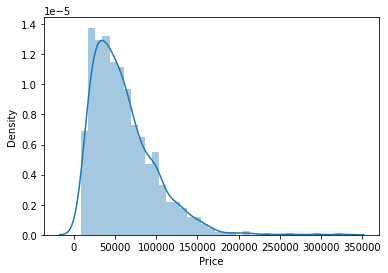

In [ ]:
sns.distplot(df['Price'])

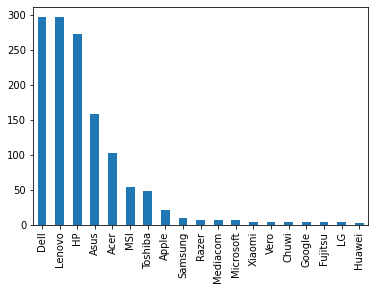

In [ ]:
df['Company'].value_counts().plot(kind='bar')

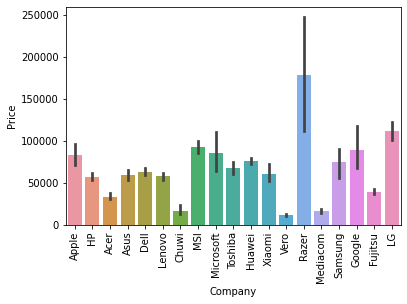

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

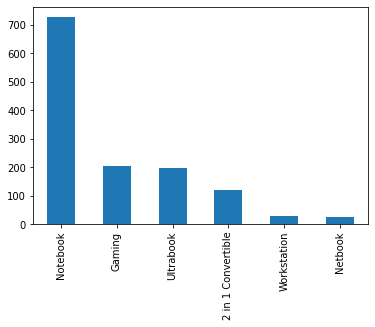

In [ ]:
df['TypeName'].value_counts().plot(kind='bar')

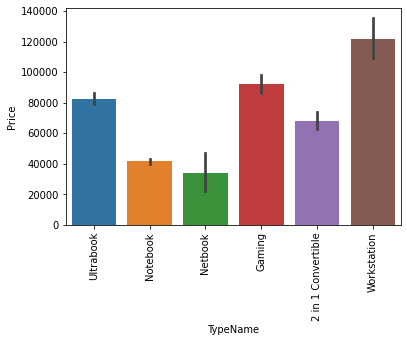

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


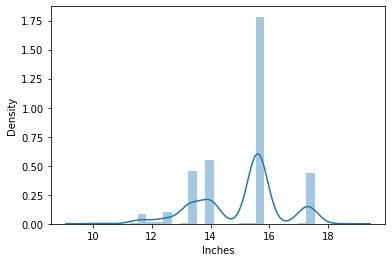

In [ ]:
sns.distplot(df['Inches'])

In [ ]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [ ]:
explorecols=['TypeName','Cpu','Gpu','Inches','Ram','Memory','OpSys','Weight']

for i in explorecols:
    print("%-10s\n%-200s\n%-10d\n"%(i,df[i].unique(),df[i].nunique()))

TypeName  
['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']                                                                                                                         
6         

Cpu       
['Intel Core i5 2.3GHz' 'Intel Core i5 1.8GHz'
 'Intel Core i5 7200U 2.5GHz' 'Intel Core i7 2.7GHz'
 'Intel Core i5 3.1GHz' 'AMD A9-Series 9420 3GHz' 'Intel Core i7 2.2GHz'
 'Intel Core i7 8550U 1.8GHz' 'Intel Core i5 8250U 1.6GHz'
 'Intel Core i3 6006U 2GHz' 'Intel Core i7 2.8GHz'
 'Intel Core M m3 1.2GHz' 'Intel Core i7 7500U 2.7GHz'
 'Intel Core i7 2.9GHz' 'Intel Core i3 7100U 2.4GHz'
 'Intel Atom x5-Z8350 1.44GHz' 'Intel Core i5 7300HQ 2.5GHz'
 'AMD E-Series E2-9000e 1.5GHz' 'Intel Core i5 1.6GHz'
 'Intel Core i7 8650U 1.9GHz' 'Intel Atom x5-Z8300 1.44GHz'
 'AMD E-Series E2-6110 1.5GHz' 'AMD A6-Series 9220 2.5GHz'
 'Intel Celeron Dual Core N3350 1.1GHz' 'Intel Core i3 7130U 2.7GHz'
 'Intel Core i7 7700HQ 2.8GHz' 'Intel Core i5 2.0GHz'
 'AMD Ryzen 1700

In [ ]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


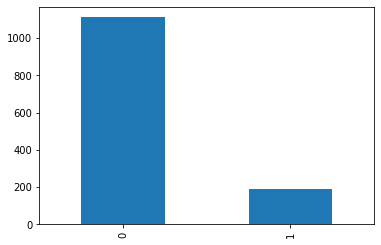

In [ ]:
df['Touchscreen'].value_counts().plot(kind='bar')

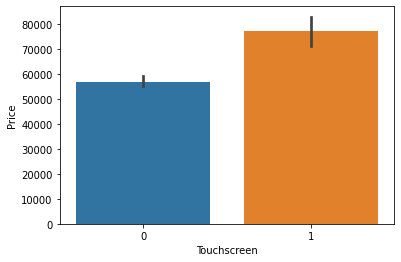

In [ ]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [ ]:
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


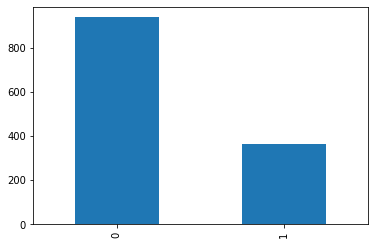

In [ ]:
df['Ips'].value_counts().plot(kind='bar')

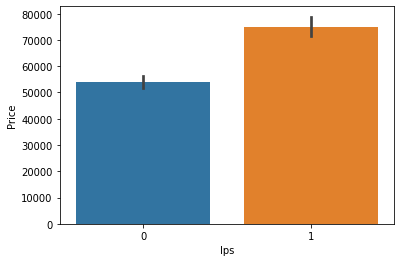

In [ ]:
sns.barplot(x=df['Ips'],y=df['Price'])

In [ ]:
df['ScreenResolution_x']=df['ScreenResolution'].str.extract('(\d\d\d\d?)',expand=True)


In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ScreenResolution_x
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560


In [ ]:
df['ScreenResolution_z']=df['ScreenResolution'].str.extract('(x\d\d\d\d?)',expand=True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ScreenResolution_x,ScreenResolution_z
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,x1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,x1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,x1600


In [ ]:
df['ScreenResolution_y']=df['ScreenResolution_z'].str.extract('(\d\d\d\d?)',expand=True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ScreenResolution_x,ScreenResolution_z,ScreenResolution_y
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,x1600,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,x900,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,x1080,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,x1800,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,x1600,1600


In [ ]:
df.drop(columns = 'ScreenResolution_z',inplace = True)

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ScreenResolution_x,ScreenResolution_y
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [ ]:
df['ScreenResolution_x'] = df['ScreenResolution_x'].astype('int')
df['ScreenResolution_y'] = df['ScreenResolution_y'].astype('int')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1303 non-null   float64
 3   ScreenResolution    1303 non-null   object 
 4   Cpu                 1303 non-null   object 
 5   Ram                 1303 non-null   int32  
 6   Memory              1303 non-null   object 
 7   Gpu                 1303 non-null   object 
 8   OpSys               1303 non-null   object 
 9   Weight              1303 non-null   float32
 10  Price               1303 non-null   float64
 11  Touchscreen         1303 non-null   int64  
 12  Ips                 1303 non-null   int64  
 13  ScreenResolution_x  1303 non-null   int64  
 14  ScreenResolution_y  1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7

In [ ]:
df['ppi'] = (((df['ScreenResolution_x']**2) + (df['ScreenResolution_y']**2))**0.5/df['Inches']).astype('float')

In [ ]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ScreenResolution_x,ScreenResolution_y,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [ ]:
df.corr()['Price']

Inches                0.068197
Ram                   0.743007
Weight                0.210366
Price                 1.000000
Touchscreen           0.191226
Ips                   0.252208
ScreenResolution_x    0.556529
ScreenResolution_y    0.552809
ppi                   0.473487
Name: Price, dtype: float64

In [ ]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ScreenResolution_x,ScreenResolution_y,ppi
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [ ]:
df.drop(columns=['Inches','ScreenResolution_x','ScreenResolution_y'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [ ]:
df['Cpu_copy']=0

#Intel processors
df.loc[df['Cpu'].str.contains('Core M'),'Cpu_copy']="Intel M "
df.loc[df['Cpu'].str.contains('Atom'),'Cpu_copy']="Intel Atom"
df.loc[df['Cpu'].str.contains('Celeron'),'Cpu_copy']="Intel Celeron"
df.loc[df['Cpu'].str.contains('Pentium'),'Cpu_copy']="Intel Pentium"
df.loc[df['Cpu'].str.contains('i3'),'Cpu_copy']="Intel i3"
df.loc[df['Cpu'].str.contains('i5'),'Cpu_copy']="Intel i5"
df.loc[df['Cpu'].str.contains('i7'),'Cpu_copy']="Intel i7"
df.loc[df['Cpu'].str.contains('Xeon'),'Cpu_copy']="Intel Xeon"


#AMD processors
df.loc[df['Cpu'].str.contains('AMD E-Series'),'Cpu_copy']="AMD E"
df.loc[df['Cpu'].str.contains('AMD FX'),'Cpu_copy']="AMD FX"
df.loc[df['Cpu'].str.contains('AMD A4'),'Cpu_copy']="AMD A4"
df.loc[df['Cpu'].str.contains('AMD A6'),'Cpu_copy']="AMD A6"
df.loc[df['Cpu'].str.contains('AMD A8'),'Cpu_copy']="AMD A8"
df.loc[df['Cpu'].str.contains('AMD A9'),'Cpu_copy']="AMD A9"
df.loc[df['Cpu'].str.contains('AMD A10'),'Cpu_copy']="AMD A10"
df.loc[df['Cpu'].str.contains('AMD A12'),'Cpu_copy']="AMD A12"
df.loc[df['Cpu'].str.contains('AMD Ryzen'),'Cpu_copy']="AMD Ryzen"



#Samsung processors
df.loc[df['Cpu'].str.contains('Samsung'),'Cpu_copy']="Samsung"


In [ ]:
print(list(df['Cpu_copy']).count(0))

0


In [ ]:
for i in range(len(df['Cpu_copy'])):
     if df['Cpu_copy'][i]==0:
         print(df['Cpu'][i])

In [ ]:
df['Cpu']=df['Cpu_copy']
df.drop(columns=['Cpu_copy'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi
0,Apple,Ultrabook,Intel i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


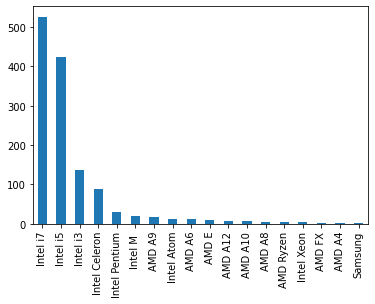

In [ ]:
df['Cpu'].value_counts().plot(kind='bar')

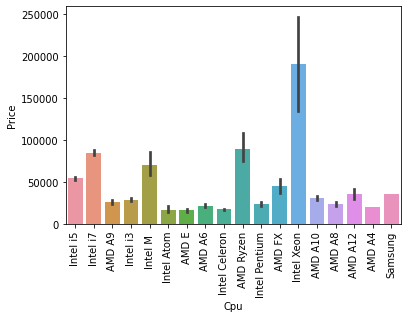

In [ ]:
sns.barplot(x=df['Cpu'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

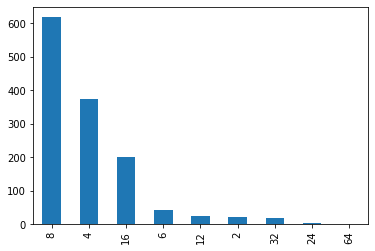

In [ ]:
df['Ram'].value_counts().plot(kind='bar')

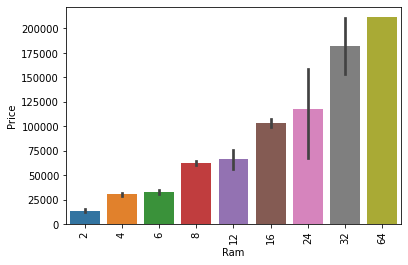

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [ ]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n = 1, expand = True)

df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]

df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: The default value of regex will change from True to False in a future version.
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: FutureWarning: The default value of regex will change from True to False in a future version.


In [ ]:
for i in range(len(df['HDD'])):
    if (df['HDD'][i]==0 and df['Hybrid'][i]==0) and (df['SSD'][i]==0 and df['Flash_Storage'][i]==0):
        print(i)

In [ ]:
df.drop(columns=['Memory'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel i5,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,0,128,0,0
1,Apple,Ultrabook,Intel i5,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0,0,0,128
2,HP,Notebook,Intel i5,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0,256,0,0
3,Apple,Ultrabook,Intel i7,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,0,512,0,0
4,Apple,Ultrabook,Intel i5,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,0,256,0,0


In [ ]:
df.corr()['Price']

Ram              0.743007
Weight           0.210366
Price            1.000000
Touchscreen      0.191226
Ips              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

In [ ]:
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [ ]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
0,Apple,Ultrabook,Intel i5,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,0,128,0,0,Intel
1,Apple,Ultrabook,Intel i5,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0,0,0,128,Intel
2,HP,Notebook,Intel i5,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0,256,0,0,Intel
3,Apple,Ultrabook,Intel i7,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,0,512,0,0,AMD
4,Apple,Ultrabook,Intel i5,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,0,256,0,0,Intel


In [ ]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In [ ]:
for i in range(len(df['Gpu'])):
    if (df['Gpu brand'][i]=='ARM'):
        print(i)

1191


In [ ]:
display(df.iloc[1191])

Company                     Samsung
TypeName         2 in 1 Convertible
Cpu                         Samsung
Ram                               4
Gpu               ARM Mali T860 MP4
OpSys                     Chrome OS
Weight                         1.15
Price                      35111.52
Touchscreen                       1
Ips                               1
ppi                        234.5074
HDD                               0
SSD                               0
Hybrid                            0
Flash_Storage                    32
Gpu brand                       ARM
Name: 1191, dtype: object

In [ ]:
#df = df[df['Gpu brand'] != 'ARM']

In [ ]:
df.drop([1191], axis=0, inplace=True)

In [ ]:

df

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage,Gpu brand
0,Apple,Ultrabook,Intel i5,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,0,128,0,0,Intel
1,Apple,Ultrabook,Intel i5,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,0,0,0,128,Intel
2,HP,Notebook,Intel i5,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,0,256,0,0,Intel
3,Apple,Ultrabook,Intel i7,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,0,512,0,0,AMD
4,Apple,Ultrabook,Intel i5,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,0,256,0,0,Intel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,Intel i7,4,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,157.350512,0,128,0,0,Intel
1299,Lenovo,2 in 1 Convertible,Intel i7,16,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,276.053530,0,512,0,0,Intel
1300,Lenovo,Notebook,Intel Celeron,2,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,111.935204,0,0,0,64,Intel
1301,HP,Notebook,Intel i7,6,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,100.454670,1000,0,0,0,AMD


In [ ]:
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
Name: Gpu brand, dtype: int64

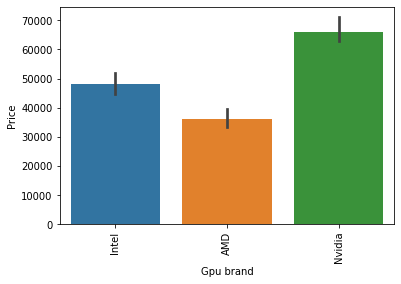

In [ ]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
df['Gpu'] = df['Gpu brand']
df.drop(columns=['Gpu brand'],inplace=True)

In [ ]:
df.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,ppi,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,Intel i5,8,Intel,macOS,1.37,71378.6832,0,1,226.983005,0,128,0,0
1,Apple,Ultrabook,Intel i5,8,Intel,macOS,1.34,47895.5232,0,0,127.677940,0,0,0,128
2,HP,Notebook,Intel i5,8,Intel,No OS,1.86,30636.0000,0,0,141.211998,0,256,0,0
3,Apple,Ultrabook,Intel i7,16,AMD,macOS,1.83,135195.3360,0,1,220.534624,0,512,0,0
4,Apple,Ultrabook,Intel i5,8,Intel,macOS,1.37,96095.8080,0,1,226.983005,0,256,0,0


In [ ]:
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

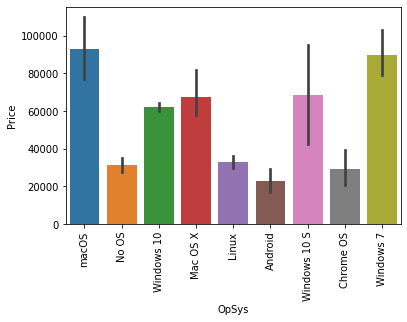

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [ ]:
df['os'] = df['OpSys'].apply(cat_os)

In [ ]:
df.drop(columns = ['OpSys'],inplace = True)

In [ ]:
df['OpSys'] = df['os']

In [ ]:
df.drop(columns = ['os'],inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


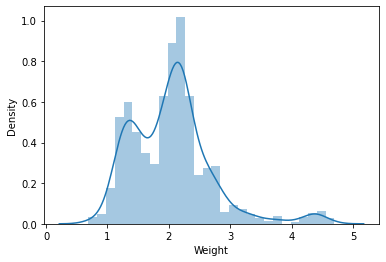

In [ ]:
sns.distplot(df['Weight'])

In [ ]:
df.drop(columns = 'Flash_Storage',inplace = True)

In [ ]:
df.corr()['Price']

Ram            0.742905
Weight         0.209863
Price          1.000000
Touchscreen    0.192917
Ips            0.253320
ppi            0.475368
HDD           -0.096891
SSD            0.670660
Hybrid         0.007942
Name: Price, dtype: float64

In [ ]:
df.drop(columns = ['Hybrid'],inplace = True)

In [ ]:
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [ ]:
X.head()

,Company,TypeName,Cpu,Ram,Gpu,Weight,Touchscreen,Ips,ppi,HDD,SSD,OpSys
0,Apple,Ultrabook,Intel i5,8,Intel,1.37,0,1,226.983005,0,128,Mac
1,Apple,Ultrabook,Intel i5,8,Intel,1.34,0,0,127.677940,0,0,Mac
2,HP,Notebook,Intel i5,8,Intel,1.86,0,0,141.211998,0,256,Others/No OS/Linux
3,Apple,Ultrabook,Intel i7,16,AMD,1.83,0,1,220.534624,0,512,Mac
4,Apple,Ultrabook,Intel i5,8,Intel,1.37,0,1,226.983005,0,256,Mac


In [ ]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1302, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.15,random_state = 1)

In [ ]:
X_train

,Company,TypeName,Cpu,Ram,Gpu,Weight,Touchscreen,Ips,ppi,HDD,SSD,OpSys
335,HP,Notebook,Intel i5,8,Intel,1.48,0,0,157.350512,0,256,Windows
786,MSI,Gaming,Intel i5,8,Nvidia,2.20,0,0,141.211998,1000,128,Windows
817,HP,Netbook,Intel Celeron,4,Intel,1.23,0,0,135.094211,0,0,Others/No OS/Linux
258,MSI,Gaming,Intel i7,16,Nvidia,4.14,0,0,127.335675,1000,512,Windows
661,Lenovo,Notebook,Intel Celeron,4,Intel,2.20,0,0,100.454670,500,0,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
715,Lenovo,Notebook,Intel i5,8,Nvidia,1.87,0,1,157.350512,0,256,Windows
905,LG,Ultrabook,Intel i7,16,Intel,1.08,1,1,141.211998,0,512,Windows
1096,Dell,Notebook,Intel i5,8,AMD,2.36,0,0,141.211998,1000,0,Windows
235,Dell,Notebook,Intel i7,16,AMD,2.36,0,0,141.211998,0,256,Others/No OS/Linux


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error

In [ ]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

Linear Regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8209158108246131
MAE 0.20332457998385264


Lasso Regression

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8139277255104319
MAE 0.2031494505049321


KNN

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,11])
],remainder='passthrough')

step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.711389899879051
MAE 0.22759467709345693


Decision Tree

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7972146988561406
MAE 0.20141832672972568


SVM

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,11])
],remainder='passthrough')

step2 = SVR(kernel='rbf',C=10000,epsilon=0.1)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.7054665356799206
MAE 0.20932444110361698


Random Forest

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8805958870989686
MAE 0.16620782210063895


Extra Trees

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,11])
],remainder='passthrough')

step2 = ExtraTreesRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              bootstrap=True,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8757329959149092
MAE 0.16840479130023617


ADA Boost

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,11])
],remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15,learning_rate=1.0)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.78830337655628
MAE 0.225063937743351


Gradient Boost

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,11])
],remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.8838522631387007
MAE 0.15840269254421036


XGBoost

In [ ]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,11])
],remainder='passthrough')

step2 = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

[20:04:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.8752926811275031
MAE 0.15614416657645855


Voting Regressor

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,11])
],remainder='passthrough')


rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,bootstrap=True,max_features=0.75,max_depth=10)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

[20:04:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.8829606250117373
MAE 0.16505274408046128


Stacking

In [ ]:
from sklearn.ensemble import VotingRegressor,StackingRegressor

step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse=False,drop='first'),[0,1,2,4,11])
],remainder='passthrough')


estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

[20:04:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:04:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 score 0.8754354554500892
MAE 0.17256539450597844


Exporting the model

In [ ]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))